In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [23]:
df = pd.read_csv("C:/Users/prate/Downloads/churn.csv")

In [24]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
df['TotalCharges'] = df['TotalCharges'].astype(str)
df = df[df['TotalCharges'] != '']
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])


In [26]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'] = df['TotalCharges'].astype(int)

In [8]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [117]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2282.830489
std,0.368844,24.545260,30.085974,2266.768490
min,0.000000,1.000000,18.250000,18.000000
25%,0.000000,9.000000,35.587500,401.000000
50%,0.000000,29.000000,70.350000,1397.000000
75%,0.000000,55.000000,89.862500,3794.250000
max,1.000000,72.000000,118.750000,8684.000000


In [27]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [28]:
cat_df = df.select_dtypes(exclude = 'number')

In [12]:
# y.head()

In [13]:
# y.shape  #target column

In [14]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7032 non-null   object
 1   gender            7032 non-null   object
 2   Partner           7032 non-null   object
 3   Dependents        7032 non-null   object
 4   PhoneService      7032 non-null   object
 5   MultipleLines     7032 non-null   object
 6   InternetService   7032 non-null   object
 7   OnlineSecurity    7032 non-null   object
 8   OnlineBackup      7032 non-null   object
 9   DeviceProtection  7032 non-null   object
 10  TechSupport       7032 non-null   object
 11  StreamingTV       7032 non-null   object
 12  StreamingMovies   7032 non-null   object
 13  Contract          7032 non-null   object
 14  PaperlessBilling  7032 non-null   object
 15  PaymentMethod     7032 non-null   object
 16  Churn             7032 non-null   object
dtypes: object(17)


In [29]:
num_df = df.select_dtypes(include = 'number')

In [30]:
cat_df

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


# univariate analysis

<Axes: ylabel='StreamingTV'>

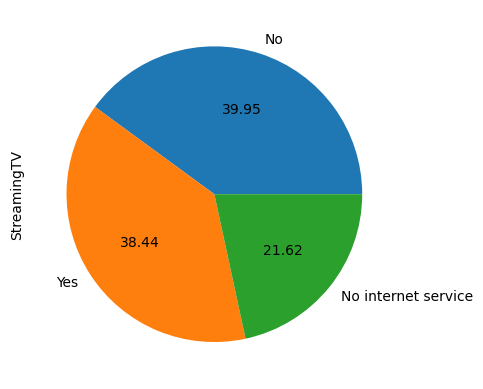

In [15]:
df['StreamingTV'].value_counts().plot.pie(autopct = "%.2f") 
# we can see here around 40% customers don't have StreamingTV option and 21% customers don't have internet service.

<Axes: ylabel='StreamingMovies'>

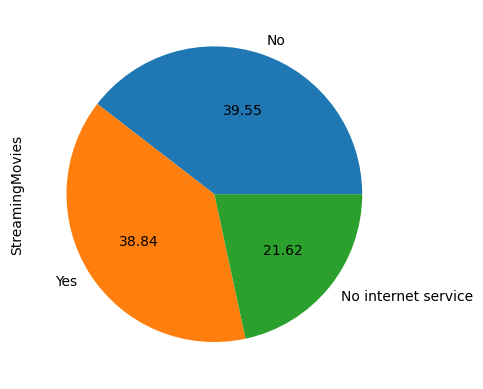

In [18]:
df['StreamingMovies'].value_counts().plot.pie(autopct = "%.2f") 
# we can see here around 40% customers don't have StreamingMovies option and 21% customers don't have internet service.

<Axes: ylabel='gender'>

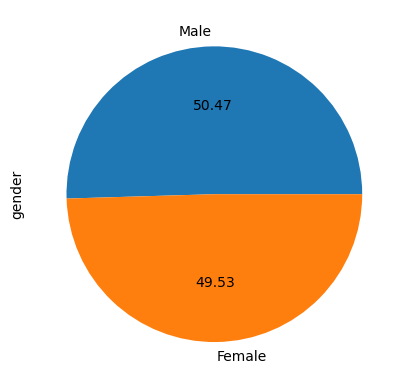

In [16]:
df['gender'].value_counts().plot.pie(autopct = "%.2f") 
# we can see here 50% customers are male and 50% customers are female.

<Axes: ylabel='Partner'>

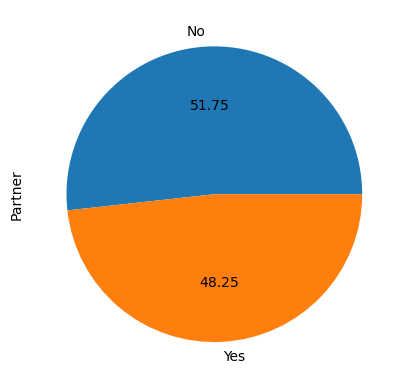

In [17]:
df['Partner'].value_counts().plot.pie(autopct = "%.2f")
# we can see here around 52% customers have partner.

<Axes: ylabel='Dependents'>

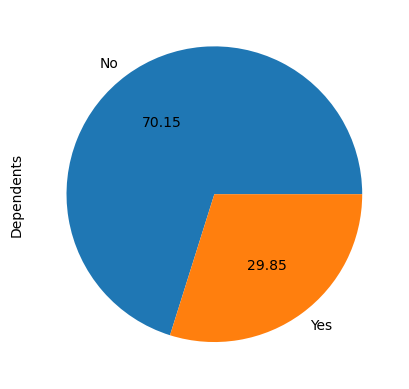

In [18]:
df['Dependents'].value_counts().plot.pie(autopct = "%.2f")
# we can see here around 70% customers have dependents.

<Axes: ylabel='TechSupport'>

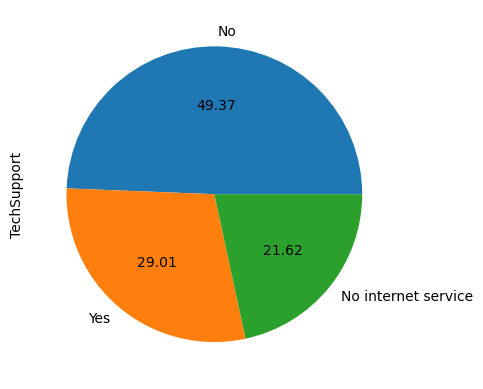

In [22]:
df['TechSupport'].value_counts().plot.pie(autopct = "%.2f")
#here we can see only 29% customers have technical support and this could be important factor in churn. 

<Axes: ylabel='OnlineSecurity'>

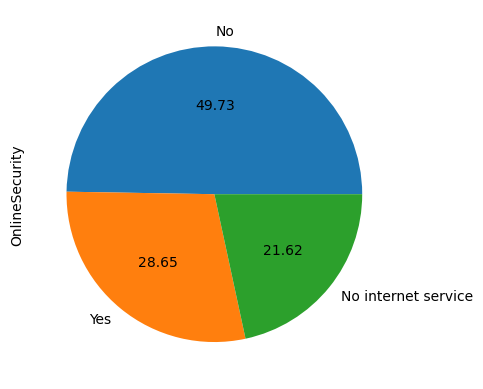

In [23]:
df['OnlineSecurity'].value_counts().plot.pie(autopct = "%.2f")
#this could be another important factor as only 28% customers have online security.

<Axes: ylabel='OnlineBackup'>

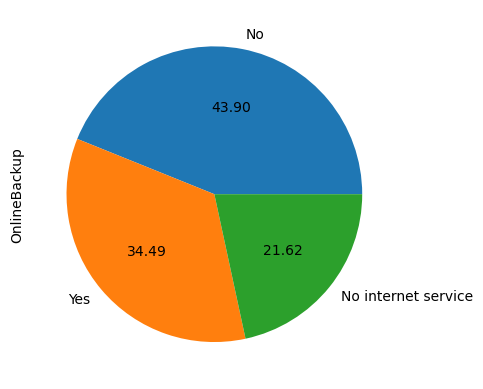

In [24]:
df['OnlineBackup'].value_counts().plot.pie(autopct = "%.2f")
# we can see here only 34% customers have online backup.

<Axes: ylabel='Contract'>

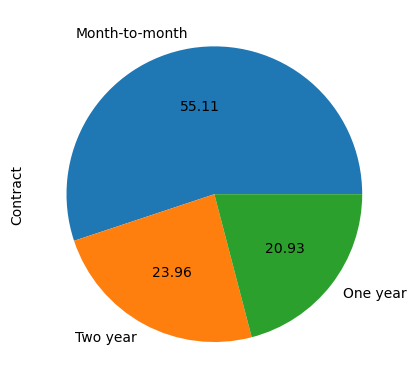

In [19]:
df['Contract'].value_counts().plot.pie(autopct = "%.2f")
#we can see here customers who have month-to-month contract are more.

<Axes: >

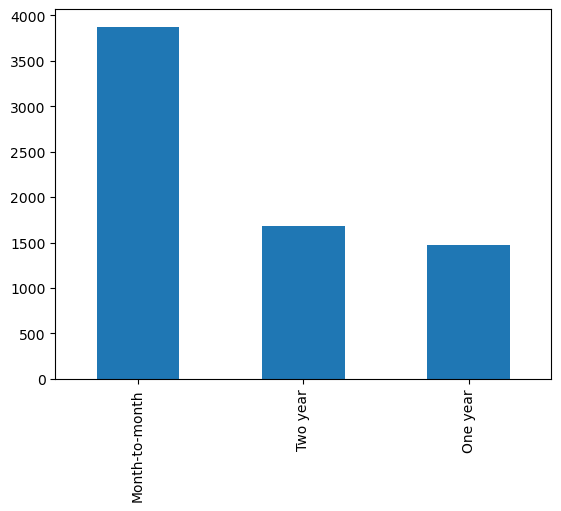

In [20]:
df['Contract'].value_counts().plot.bar()

<Axes: ylabel='PaperlessBilling'>

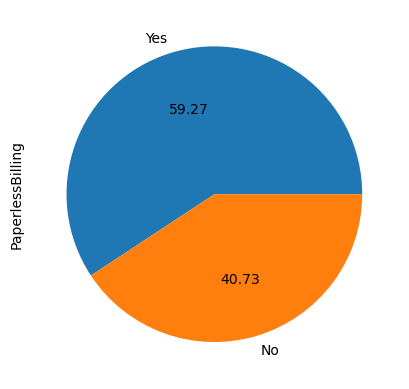

In [26]:
df['PaperlessBilling'].value_counts().plot.pie(autopct = "%.2f")
#we can see around 60% customers prefer PaperlessBilling.

<Axes: ylabel='MultipleLines'>

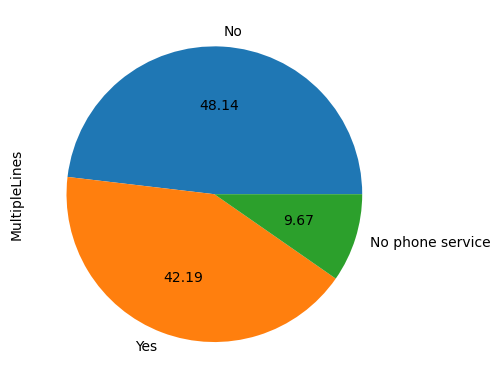

In [27]:
df['MultipleLines'].value_counts().plot.pie(autopct = "%.2f") 
# here we can see around 42% customers have MultipleLines.

<Axes: ylabel='InternetService'>

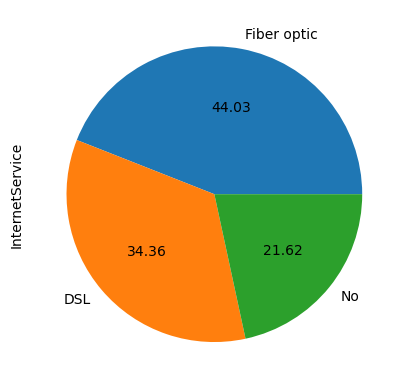

In [28]:
df['InternetService'].value_counts().plot.pie(autopct = "%.2f") 
#we can observe here customers who are using fiber optics for InternetService are more as compare to others.

<Axes: ylabel='PaymentMethod'>

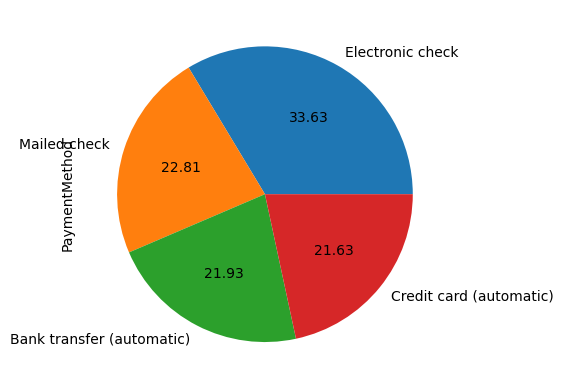

In [29]:
df['PaymentMethod'].value_counts().plot.pie(autopct = "%.2f") 

<Axes: ylabel='PhoneService'>

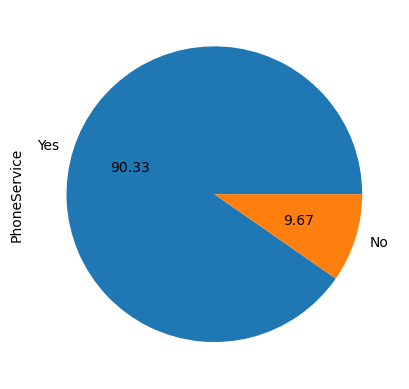

In [30]:
df['PhoneService'].value_counts().plot.pie(autopct = "%.2f") 
#we can observe here most of the customers have PhoneService.

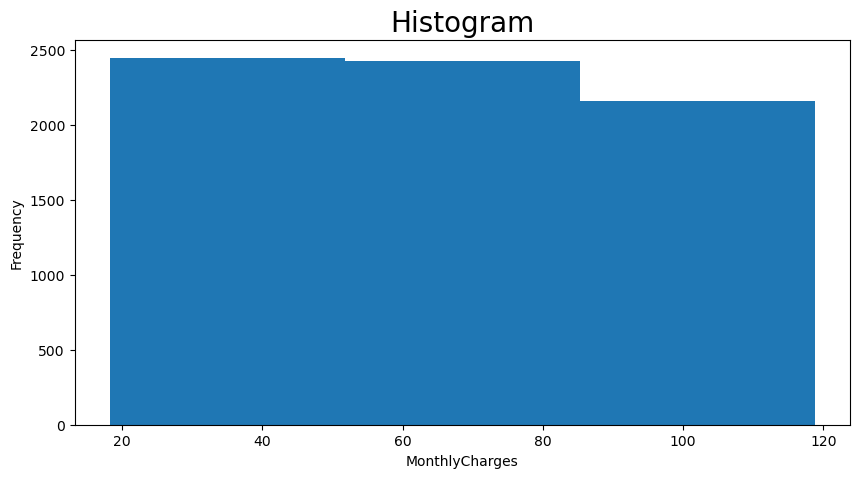

In [31]:
#histogram of 'MonthlyCharges'
plt.figure(figsize = (10,5))
plt.hist(df['MonthlyCharges'], bins = 3)
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.title("Histogram", fontsize = 20)
plt.show()

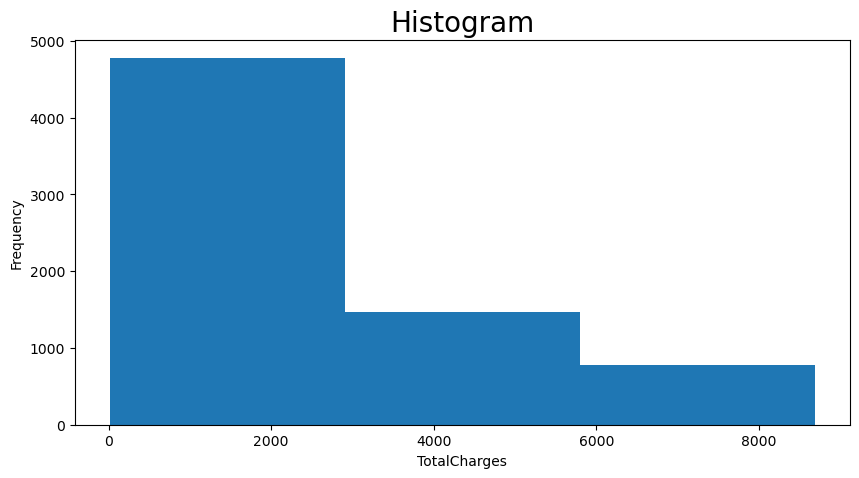

In [32]:
#histogram of 'MonthlyCharges'
plt.figure(figsize = (10,5))
plt.hist(df['TotalCharges'], bins = 3)
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.title("Histogram", fontsize = 20)
plt.show()

<Axes: ylabel='Churn'>

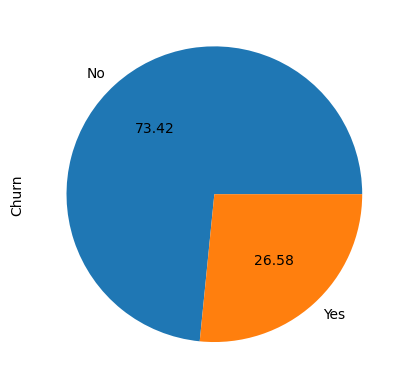

In [33]:
df['Churn'].value_counts().plot.pie(autopct = "%.2f") 
# we can observe here around 74% customer do not churn.

# bi-variate analysis

In [34]:
# bi-variate analysis between 'dependents' and 'churn'
crosstab = pd.crosstab(df['Dependents'],df['Churn']) 
crosstab

Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1773,326


<Axes: xlabel='Dependents'>

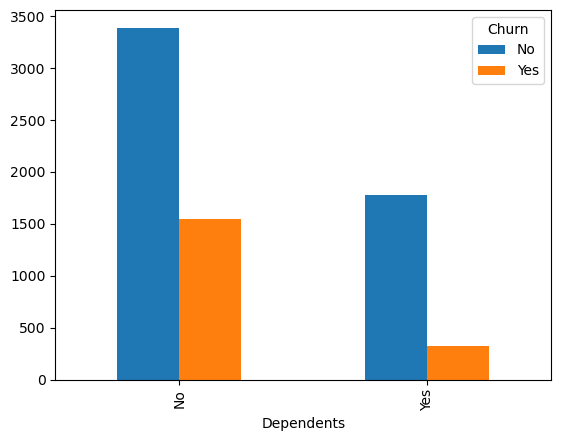

In [35]:
crosstab.plot(kind = "bar")

In [36]:
crosstab = pd.crosstab(df['Partner'],df['Churn'])
crosstab

Churn,No,Yes
Partner,,
No,2439,1200
Yes,2724,669


<Axes: xlabel='Partner'>

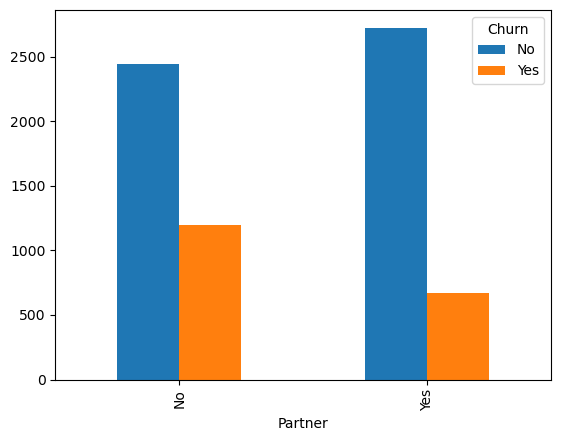

In [37]:
crosstab.plot(kind = "bar")

<Axes: xlabel='PhoneService'>

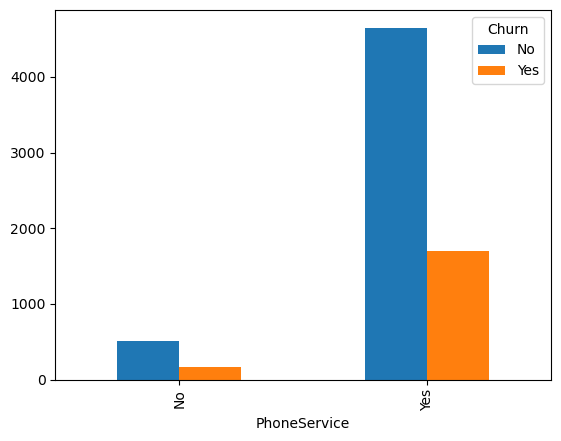

In [38]:
crosstab = pd.crosstab(df['PhoneService'],df['Churn'])
crosstab
crosstab.plot(kind = "bar")

<Axes: xlabel='MultipleLines'>

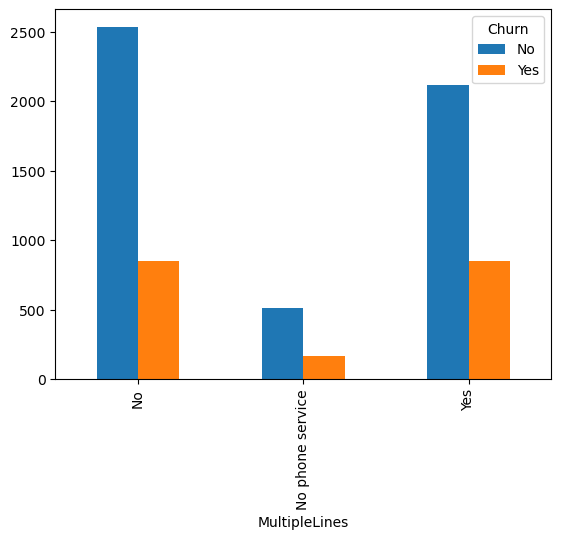

In [39]:
crosstab = pd.crosstab(df['MultipleLines'],df['Churn'])
crosstab
crosstab.plot(kind = "bar")

<Axes: xlabel='PaymentMethod'>

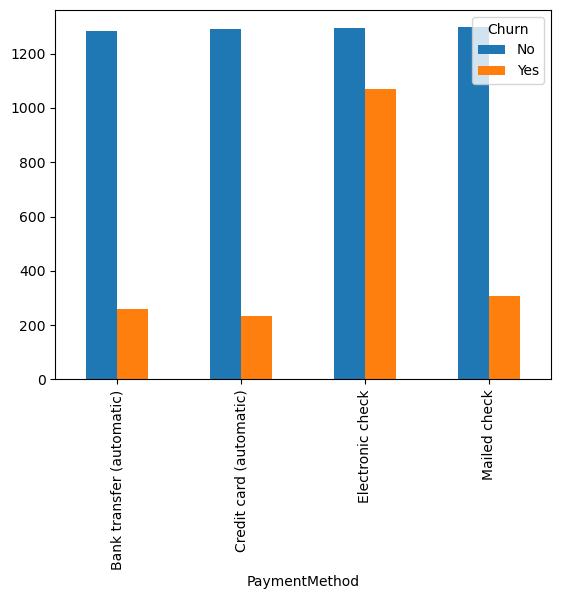

In [40]:
crosstab = pd.crosstab(df['PaymentMethod'],df['Churn'])
crosstab
crosstab.plot(kind = "bar")

<Axes: xlabel='StreamingMovies'>

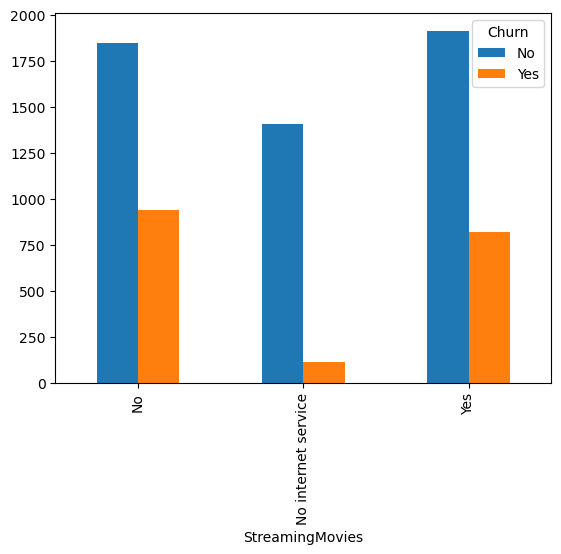

In [41]:
crosstab = pd.crosstab(df['StreamingMovies'],df['Churn'])
crosstab
crosstab.plot(kind = "bar")

<Axes: xlabel='TechSupport'>

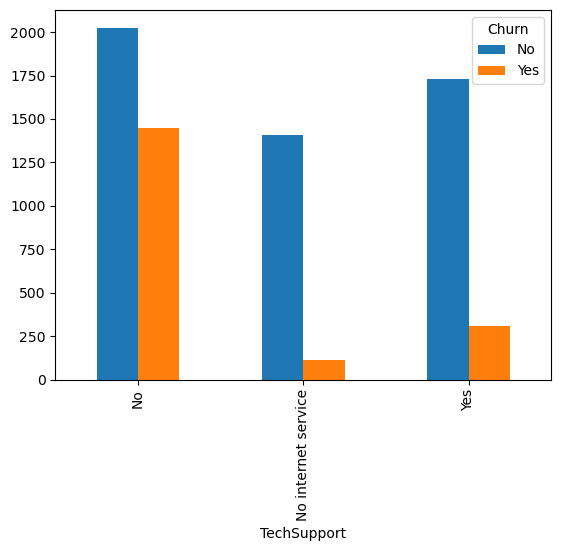

In [42]:
crosstab = pd.crosstab(df['TechSupport'],df['Churn'])
crosstab
crosstab.plot(kind = "bar")

<Axes: xlabel='SeniorCitizen'>

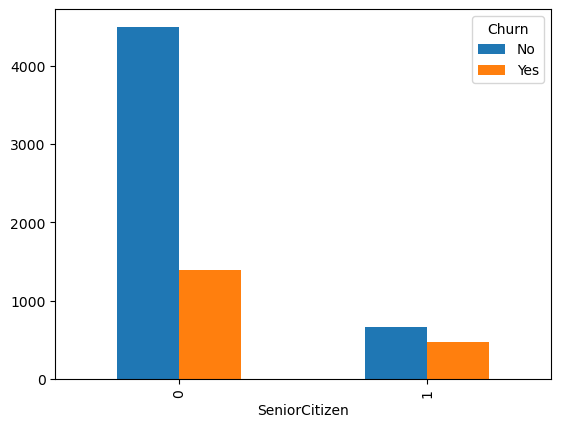

In [21]:
crosstab = pd.crosstab(df['SeniorCitizen'],df['Churn'])
crosstab
crosstab.plot(kind = "bar")

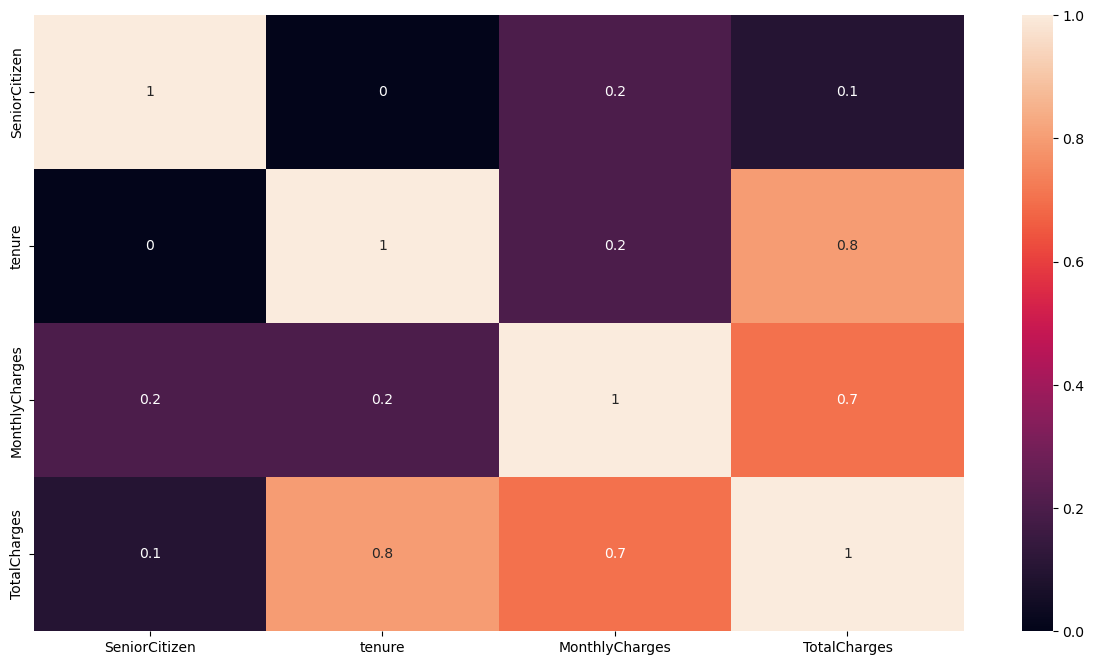

In [43]:
#correlation plot using "heatmap" between numerical columns
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

# plt.figure(figsize = (8,5))
sns.heatmap(round(num_df.corr(),1), annot = True)  

plt.show() 
# totalcharges vs tenure
# totalcharges vs monthly charges

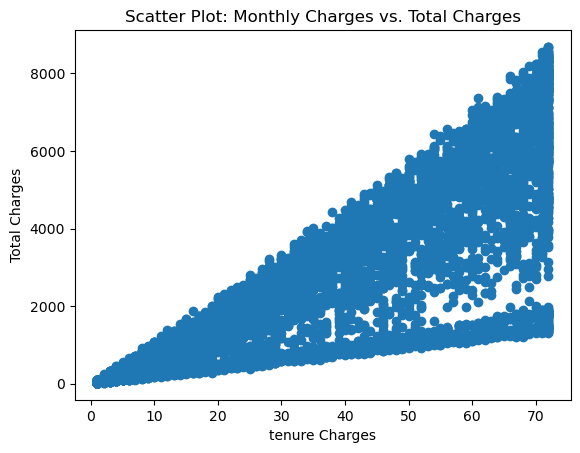

In [44]:
import matplotlib.pyplot as plt


plt.scatter(df['tenure'], df['TotalCharges'])
plt.xlabel('tenure Charges')
plt.ylabel('Total Charges')
plt.title('Scatter Plot: Monthly Charges vs. Total Charges')
plt.show()

#Total Charges increase as Monthly Charges increase - as expected.

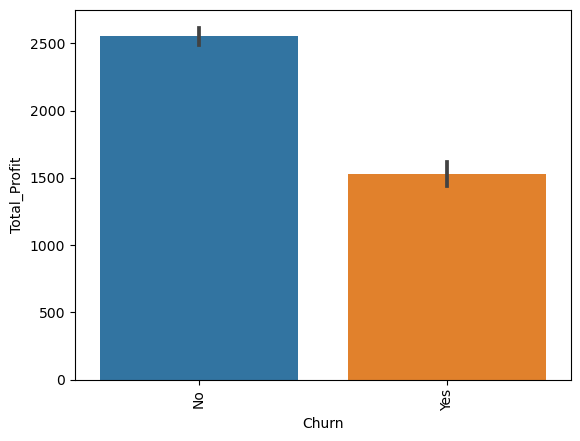

In [46]:
#using barplot
sns.barplot(x = 'Churn', y = 'TotalCharges', data = df) 
plt.xlabel("Churn")
plt.ylabel("Total_Profit")
plt.xticks(rotation = 90)
plt.show()

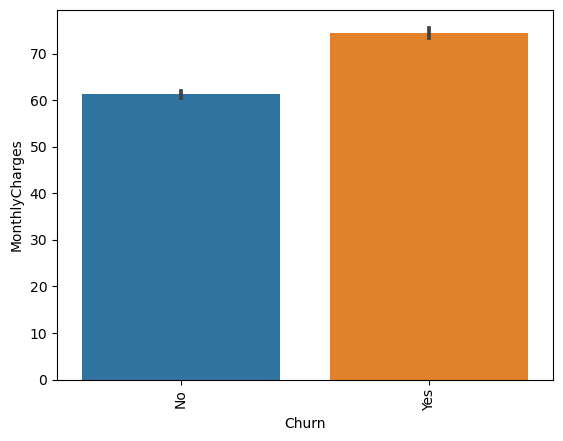

In [47]:
#using barplot
sns.barplot(x = 'Churn', y = 'MonthlyCharges', data = df) 
plt.xlabel("Churn")
plt.ylabel("MonthlyCharges")
plt.xticks(rotation = 90)
plt.show()


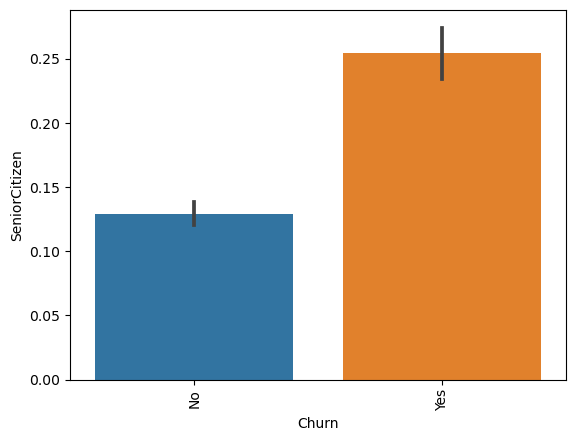

In [48]:
#using barplot
sns.barplot(x = 'Churn', y = 'SeniorCitizen', data = df) 
plt.xlabel("Churn")
plt.ylabel("SeniorCitizen")
plt.xticks(rotation = 90)
plt.show()
#

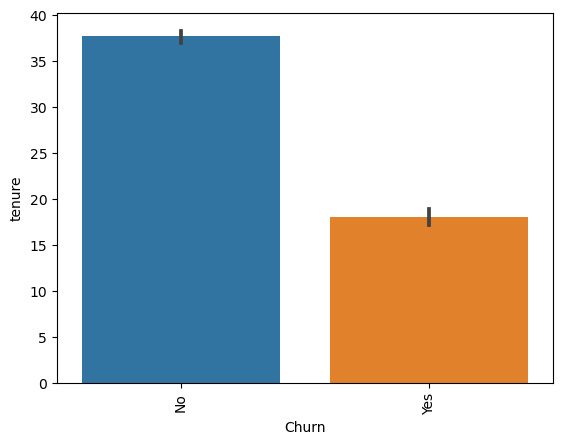

In [49]:
#tenure
#using barplot
sns.barplot(x = 'Churn', y = 'tenure', data = df) 
plt.xlabel("Churn")
plt.ylabel("tenure")
plt.xticks(rotation = 90)
plt.show() 


<Figure size 800x600 with 0 Axes>

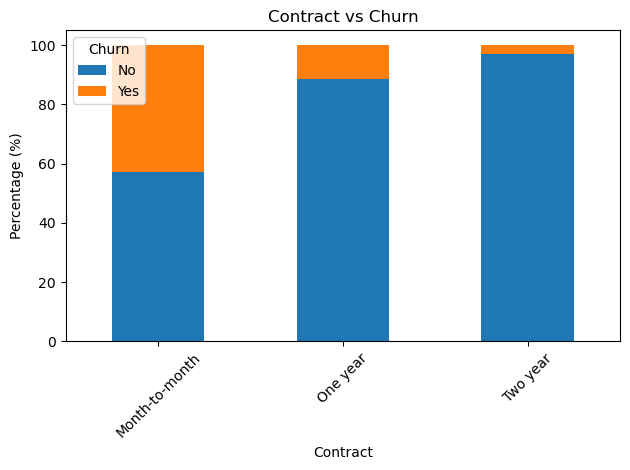

<Figure size 800x600 with 0 Axes>

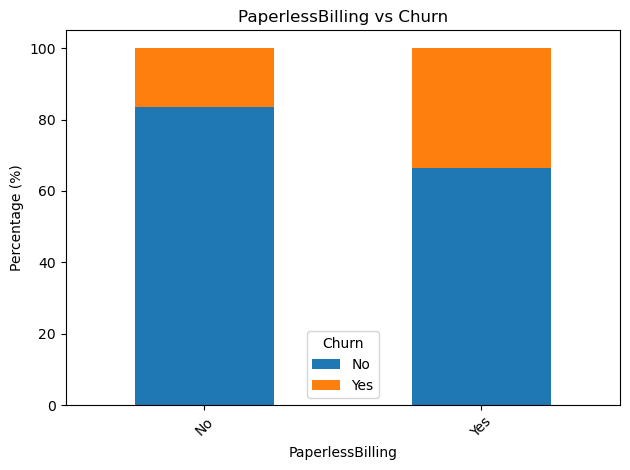

<Figure size 800x600 with 0 Axes>

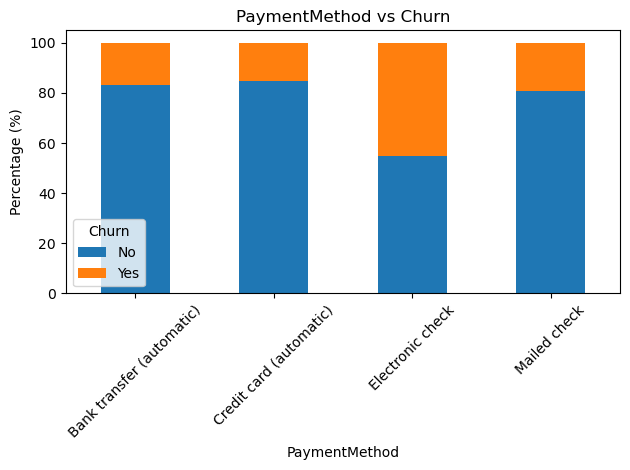

In [50]:

df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

categorical_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']
target_column = 'Churn'

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    cross_tab = pd.crosstab(df[col], df[target_column], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True)
    plt.xlabel(col)
    plt.ylabel('Percentage (%)')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.legend(title=target_column, labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()


# analysis 

In [123]:
##**Derived Insight: **

# **HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

# **LOW** Churn is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

#Factors like **Gender**, **Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn



# These are some of the quick insights from this exercise:

# 1. Electronic check medium are the highest churners
# 2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
# 3. No Online security, No Tech Support category are high churners
# 4. Non senior Citizens are high churners.
# 5. 'MonthlyCharges' and 'TotalCharges': These are important numerical features. High monthly charges or high total charges might lead to churn, especially if customers find them unaffordable.                                        #6.Partner and Dependents: customers with partners and dependents may be less likely to churn due to family needs or bundled services.



In [51]:
# from these plots here are some points which i observed:

#gender: Gender might not have a strong influence on churn. 


#SeniorCitizen: This could be relevant, as senior citizens might have different preferences and needs when it comes to telecom services.


#Partner and Dependents: customers with partners and dependents may be less likely to churn due to family needs or bundled services.

#tenure: Tenure is often a critical predictor. Long-term customers are generally less likely to churn than new customers.


# PhoneService and MultipleLines: These columns may affect churn, as the availability of phone and multiple lines might influence a customer's decision to stay.

#  InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies: These are import features.The type of internet service and additional features can significantly impact customer satisfaction and, therefore, churn.

# Contract: Contract length (month-to-month, one year, two years) is one of the most critical predictors. Short-term contracts (month-to-month) are often associated with higher churn rates.

# PaperlessBilling: This can be relevant, as customers who receive electronic bills may have different behaviors than those receiving paper bills.

# PaymentMethod: Payment method can be relevant, as certain payment methods might be associated with higher churn rates.

# 'MonthlyCharges' and 'TotalCharges': These are important numerical features. High monthly charges or high total charges might lead to churn, especially if customers find them unaffordable.

In [31]:
y = cat_df['Churn']
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [32]:
cat_df.drop(["customerID","Churn"],axis=1,inplace=True)  #removing customer id bcoz it is not required

In [33]:
cat_df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [34]:
cat_df.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [35]:
dumm = ['InternetService','MultipleLines','Contract','PaymentMethod','StreamingMovies','StreamingTV']
pd.get_dummies(cat_df,columns=dumm)

,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,InternetService_DSL,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes
0,Female,Yes,No,No,No,Yes,No,No,Yes,1,...,0,0,1,0,1,0,0,1,0,0
1,Male,No,No,Yes,Yes,No,Yes,No,No,1,...,0,0,0,1,1,0,0,1,0,0
2,Male,No,No,Yes,Yes,Yes,No,No,Yes,1,...,0,0,0,1,1,0,0,1,0,0
3,Male,No,No,No,Yes,No,Yes,Yes,No,1,...,1,0,0,0,1,0,0,1,0,0
4,Female,No,No,Yes,No,No,No,No,Yes,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,1,...,0,0,0,1,0,0,1,0,0,1
7039,Female,Yes,Yes,Yes,No,Yes,Yes,No,Yes,0,...,0,1,0,0,0,0,1,0,0,1
7040,Female,Yes,Yes,No,Yes,No,No,No,Yes,1,...,0,0,1,0,1,0,0,1,0,0
7041,Male,Yes,No,Yes,No,No,No,No,Yes,0,...,0,0,0,1,1,0,0,1,0,0


In [36]:
cat_df = pd.get_dummies(cat_df,columns=dumm)

In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# List of columns to be encoded
columns_to_encode = ['gender','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','PaperlessBilling']

# Apply label encoding to the specified columns
cat_df[columns_to_encode] = cat_df[columns_to_encode].apply(lambda col: label_encoder.fit_transform(col))




In [59]:
#cat_df['InternetService'].unique()

In [60]:
#columns_to_one_hot_encoding = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection'
 #                             ,'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

#pd.get_dummies(cat_df,columns= columns_to_one_hot_encoding)

In [61]:
#cat_df = pd.get_dummies(cat_df,columns= columns_to_one_hot_encoding)

In [38]:
cat_df.head()


,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,InternetService_DSL,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes
0,0,1,0,0,0,2,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
1,1,0,0,1,2,0,2,0,0,1,...,0,0,0,1,1,0,0,1,0,0
2,1,0,0,1,2,2,0,0,1,1,...,0,0,0,1,1,0,0,1,0,0
3,1,0,0,0,2,0,2,2,0,1,...,1,0,0,0,1,0,0,1,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0


In [39]:
num_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29
1,0,34,56.95,1889
2,0,2,53.85,108
3,0,45,42.30,1840
4,0,2,70.70,151
...,...,...,...,...
7038,0,24,84.80,1990
7039,0,72,103.20,7362
7040,0,11,29.60,346
7041,1,4,74.40,306


In [40]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
num_df =ss.fit_transform(num_df)

#pd.DataFrame(ss.fit_transform(num_df), columns=num_df.columns)

In [41]:
num_df = pd.DataFrame(num_df, columns = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges'])

In [42]:
num_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.440327,-1.280248,-1.161694,-0.994363
1,-0.440327,0.064303,-0.260878,-0.173753
2,-0.440327,-1.239504,-0.363923,-0.959509
3,-0.440327,0.512486,-0.747850,-0.195372
4,-0.440327,-1.239504,0.196178,-0.940538
...,...,...,...,...
7027,-0.440327,-0.343137,0.664868,-0.129193
7028,-0.440327,1.612573,1.276493,2.240869
7029,-0.440327,-0.872808,-1.170004,-0.854506
7030,2.271039,-1.158016,0.319168,-0.872154


In [43]:
cat_df.reset_index(drop=True,inplace=True)

In [44]:
num_df.reset_index(drop=True,inplace=True)

In [45]:
df = pd.concat([num_df,cat_df], axis=1)

In [46]:
x = df.copy()

In [47]:
x.shape

(7032, 32)

In [48]:
len(y)

7032

# splitting the data 

In [49]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [50]:
df.shape , x_train.shape , x_test.shape , y_train , y_test

((7032, 32),
 (5625, 32),
 (1407, 32),
 5182     No
 5132     No
 7039     No
 1132    Yes
 5257    Yes
        ... 
 619      No
 656      No
 3742     No
 2989     No
 887      No
 Name: Churn, Length: 5625, dtype: object,
 2161    Yes
 3848     No
 23       No
 1368     No
 2824     No
        ... 
 857     Yes
 6367     No
 773     Yes
 3351    Yes
 1634     No
 Name: Churn, Length: 1407, dtype: object)

In [51]:
x_train.shape 

(5625, 32)

In [52]:
y_train.shape 

(5625,)

In [53]:
x_test.shape

(1407, 32)

In [54]:
y_test.shape

(1407,)

# KNN MODEL BUILDING

In [55]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =13) #initializing the model
classifier.fit(x_train,y_train) #training the model

KNeighborsClassifier(n_neighbors=13)

In [56]:
y_pred = classifier.predict(x_test)

In [57]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [59]:
confusion_matrix(y_test,y_pred) #confusion matrix

array([[895, 121],
       [182, 209]], dtype=int64)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.83      0.88      0.86      1016
         Yes       0.63      0.53      0.58       391

    accuracy                           0.78      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.78      0.78      1407



In [61]:
accuracy_score(y_test,y_pred)*100

78.46481876332622

In [62]:
error = []
for i in range(2,51):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)

  error.append(np.mean(pred_i!=y_test))

  print(error)

[0.24662402274342574]
[0.24662402274342574, 0.24378109452736318]
[0.24662402274342574, 0.24378109452736318, 0.22956645344705046]
[0.24662402274342574, 0.24378109452736318, 0.22956645344705046, 0.23667377398720682]
[0.24662402274342574, 0.24378109452736318, 0.22956645344705046, 0.23667377398720682, 0.23098791755508175]
[0.24662402274342574, 0.24378109452736318, 0.22956645344705046, 0.23667377398720682, 0.23098791755508175, 0.232409381663113]
[0.24662402274342574, 0.24378109452736318, 0.22956645344705046, 0.23667377398720682, 0.23098791755508175, 0.232409381663113, 0.21677327647476902]
[0.24662402274342574, 0.24378109452736318, 0.22956645344705046, 0.23667377398720682, 0.23098791755508175, 0.232409381663113, 0.21677327647476902, 0.21890547263681592]
[0.24662402274342574, 0.24378109452736318, 0.22956645344705046, 0.23667377398720682, 0.23098791755508175, 0.232409381663113, 0.21677327647476902, 0.21890547263681592, 0.21108742004264391]
[0.24662402274342574, 0.24378109452736318, 0.229566453

[0.24662402274342574, 0.24378109452736318, 0.22956645344705046, 0.23667377398720682, 0.23098791755508175, 0.232409381663113, 0.21677327647476902, 0.21890547263681592, 0.21108742004264391, 0.21890547263681592, 0.2103766879886283, 0.21535181236673773, 0.2046908315565032, 0.208955223880597, 0.20042643923240938, 0.2103766879886283, 0.21179815209665956, 0.2068230277185501, 0.21108742004264391, 0.20540156361051884, 0.2046908315565032, 0.20540156361051884, 0.2046908315565032, 0.2068230277185501, 0.20966595593461265, 0.20184790334044064, 0.20611229566453448, 0.2046908315565032, 0.20184790334044064, 0.2046908315565032, 0.20326936744847193]
[0.24662402274342574, 0.24378109452736318, 0.22956645344705046, 0.23667377398720682, 0.23098791755508175, 0.232409381663113, 0.21677327647476902, 0.21890547263681592, 0.21108742004264391, 0.21890547263681592, 0.2103766879886283, 0.21535181236673773, 0.2046908315565032, 0.208955223880597, 0.20042643923240938, 0.2103766879886283, 0.21179815209665956, 0.20682302

[0.24662402274342574, 0.24378109452736318, 0.22956645344705046, 0.23667377398720682, 0.23098791755508175, 0.232409381663113, 0.21677327647476902, 0.21890547263681592, 0.21108742004264391, 0.21890547263681592, 0.2103766879886283, 0.21535181236673773, 0.2046908315565032, 0.208955223880597, 0.20042643923240938, 0.2103766879886283, 0.21179815209665956, 0.2068230277185501, 0.21108742004264391, 0.20540156361051884, 0.2046908315565032, 0.20540156361051884, 0.2046908315565032, 0.2068230277185501, 0.20966595593461265, 0.20184790334044064, 0.20611229566453448, 0.2046908315565032, 0.20184790334044064, 0.2046908315565032, 0.20326936744847193, 0.20753375977256575, 0.20326936744847193, 0.20326936744847193, 0.20611229566453448, 0.2082444918265814, 0.208955223880597, 0.2103766879886283, 0.20326936744847193, 0.2082444918265814, 0.20753375977256575, 0.208955223880597, 0.2082444918265814]
[0.24662402274342574, 0.24378109452736318, 0.22956645344705046, 0.23667377398720682, 0.23098791755508175, 0.232409381

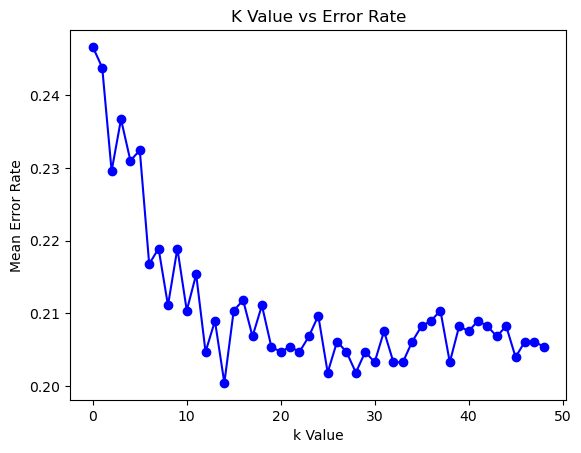

In [63]:
import matplotlib.pyplot as plt 
plt.plot(error,color='blue',marker='o')
plt.xlabel('k Value')
plt.ylabel('Mean Error Rate')
plt.title('K Value vs Error Rate')
plt.show()

# naive base model building

In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:

clf = GaussianNB(var_smoothing = 0.0001)     #hyper parameter 
clf.fit(x_train,y_train)

GaussianNB(var_smoothing=0.0001)

In [66]:
test_prediction = clf.predict(x_test)

In [67]:
print("validation Accuracy:", accuracy_score(y_test, test_prediction))

validation Accuracy: 0.7228144989339019


# SVM model building

In [68]:
from sklearn.svm import SVC #support vector classifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [69]:
rbf_svm = SVC(kernel='rbf', C=100, gamma=0.03, random_state=0)
# Train the classifier
rbf_svm.fit(x_train, y_train)

test_predictions=rbf_svm.predict(x_test)
train_predictions=rbf_svm.predict(x_train)

print(confusion_matrix(y_test, test_predictions))

print(classification_report(y_test, test_predictions))

print("Train Accuracy:",accuracy_score(y_train, train_predictions)*100)
print("Test Accuracy:",accuracy_score(y_test, test_predictions)*100)

[[893 123]
 [177 214]]
              precision    recall  f1-score   support

          No       0.83      0.88      0.86      1016
         Yes       0.64      0.55      0.59       391

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407

Train Accuracy: 86.00888888888889
Test Accuracy: 78.67803837953092
